In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as pl

data=pd.read_csv('insurance.csv')
'dropping SEX column as it doesnt affect our target variable as seen in our Exploratory Analysis'
data=data.drop(['sex'],axis=1)


In [2]:
'                              Data Preprocessing '
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(data.smoker.drop_duplicates()) 
data.smoker = le.transform(data.smoker)

from sklearn.compose import make_column_transformer

column_trans=make_column_transformer((OneHotEncoder(),['region']),remainder='passthrough')
data=column_trans.fit_transform(data)

f=np.stack((data[:,1],data[:,2],data[:,3],data[:,4],data[:,5],data[:,6],data[:,7]),axis=1) #Features array
y=data[:,8]
y=y.reshape(1338,1)

from sklearn.preprocessing import StandardScaler
obj=StandardScaler()
obj2=StandardScaler()
f=obj.fit_transform(f)
y=obj2.fit_transform(y)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(f,y,test_size=0.2)



In [7]:
'Testing for models mentioned in Exploratory Analysis'
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold

poly=PolynomialFeatures(degree=2)
xtrainpoly=poly.fit_transform(xtrain)
xtestpoly=poly.transform(xtest)





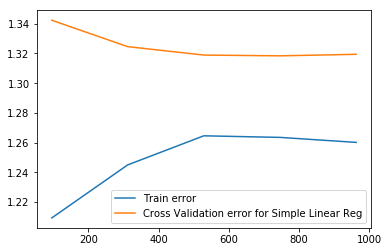

In [5]:
'Linear Regression Testing'
kf=KFold(10,shuffle=True)
kf.get_n_splits(xtrain)

training_size1,train_error1,test_error1=learning_curve(LinearRegression(),xtrain,ytrain,cv=kf,n_jobs=-1,scoring='neg_mean_squared_error')

train_mean1=np.mean(train_error1,axis=1)
train_std1=np.std(train_error1,axis=1)
test_mean1=np.mean(test_error1,axis=1)
test_std1=np.std(test_error1,axis=1)
pl.plot(training_size1,1-train_mean1+train_std1,label="Train error")
pl.plot(training_size1,1-test_mean1+test_std1,label="Cross Validation error for Simple Linear Reg")
pl.legend()


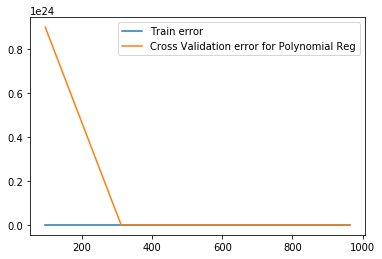

In [5]:
'Testing Polynomial Regression       '
kf2=KFold(10,shuffle=True)
kf2.get_n_splits(xtrainpoly)

training_size2,train_error2,test_error2=learning_curve(LinearRegression(),xtrainpoly,ytrain,cv=kf2,n_jobs=-1,scoring='neg_mean_squared_error')

train_mean2=np.mean(train_error2,axis=1)
train_std2=np.std(train_error2,axis=1)
test_mean2=np.mean(test_error2,axis=1)
test_std2=np.std(test_error2,axis=1)
pl.plot(training_size2,1-train_mean2+train_std2,label="Train error")
pl.plot(training_size2,1-test_mean2+test_std2,label="Cross Validation error for Polynomial Reg")
pl.legend()


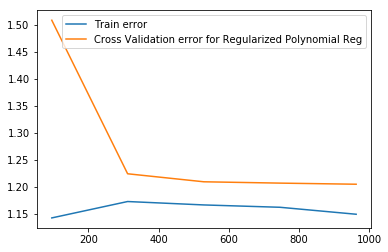

In [6]:
'Parameter Tuning of polynomial Regression using Regularization'
kf3=KFold(10,shuffle=True)
kf3.get_n_splits(xtrainpoly)

training_size3,train_error3,test_error3=learning_curve(Ridge(alpha=0.01),xtrainpoly,ytrain,cv=kf3,n_jobs=-1,scoring='neg_mean_squared_error')

train_mean3=np.mean(train_error3,axis=1)
train_std3=np.std(train_error3,axis=1)
test_mean3=np.mean(test_error3,axis=1)
test_std3=np.std(test_error3,axis=1)
pl.plot(training_size3,1-train_mean3+train_std3,label="Train error")
pl.plot(training_size3,1-test_mean3+test_std3,label="Cross Validation error for Regularized Polynomial Reg")
pl.legend()


In [8]:
' Fitting the model '

c=Ridge(alpha=0.01)
c.fit(xtrainpoly,ytrain)
z=obj2.inverse_transform(c.predict(xtestpoly))
k=obj2.inverse_transform(ytest)

' Regression Error metric'

from sklearn.metrics import r2_score
score=r2_score(k,z)
print(score)

0.8536428571762119
